# Logistic and Delivery : Happy Customer

Data Description:
Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers.

X1 = my order was delivered on time.

X2 = contents of my order was as I expected.

X3 = I ordered everything I wanted to order.

X4 = I paid a good price for my order.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above.

Find which questions/features are more important when predicting a customer’s happiness.

## Imports

In [193]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Load the dataset

In [195]:
# Load the dataset
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

# Print datatypes
print(df.dtypes)

# Describe columns
df.describe(include='all')

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object


,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [178]:
# Preview the dataset
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Model Performance

Next, split the dataset into feature vectors `X` and target vector (diagnosis) `Y` to fit a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Performance of each feature selection technique will be compared using [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) and [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) as evaluation metrics.

In [179]:
# Split feature and target vectors
X = df.drop("Y", 1)
Y = df["Y"]

### Fit the Model and Calculate Metrics

helper functions to train your model and use the scikit-learn modules to evaluate your results.

In [180]:
def fit_model(X, Y):
    '''Use a RandomForestClassifier for this problem.'''
    
    # define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [181]:
def calculate_metrics(model, X_test_scaled, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics for assesing performance of the model.
    acc = accuracy_score(Y_test, y_predict_r)
    roc = roc_auc_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [182]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    #scaler = StandardScaler().fit(X_train)
    #X_train_scaled = scaler.transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train, Y_train)

    # Make predictions on test dataset and calculate metrics.
    acc, roc, prec, rec, f1 = calculate_metrics(model, X_test, Y_test)

    return acc, roc, prec, rec, f1

In [183]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return display_df

train the model with all features included then calculate the metrics. This will be the baseline and you will compare this to the next outputs when you do feature selection.

In [184]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.653846,0.654762,0.692308,0.642857,0.666667,6


## Correlation Matrix

It is a good idea to calculate and visualize the correlation matrix of a data frame to see which features have high correlation. You can do that with just a few lines as shown below. The Pandas [corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method computes the Pearson correlation by default and you will plot it with Matlab PyPlot and Seaborn. The darker blue boxes show features with high positive correlation while white ones indicate high negative correlation. The diagonals will have 1's because the feature is mapped on to itself.

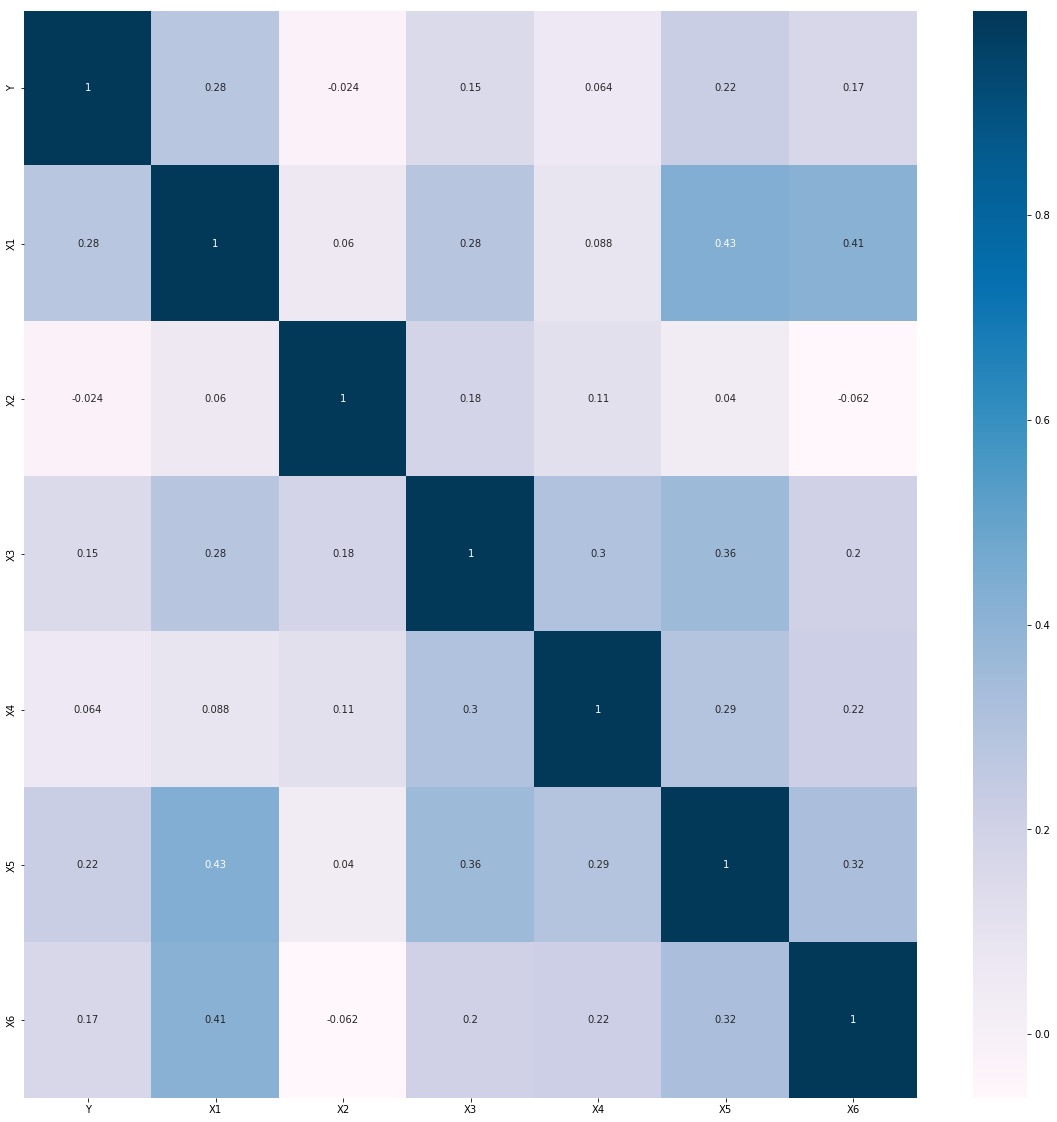

In [185]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = df.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

## Filter Methods

Let's start feature selection with filter methods. This type of feature selection uses statistical methods to rank a given set of features. Moreover, it does this ranking regardless of the model you will be training on (i.e. you only need the feature values). When using these, it is important to note the types of features and target variable you have. Here are a few examples:

* Pearson Correlation (numeric features - numeric target, *exception: when target is 0/1 coded*)
* ANOVA f-test (numeric features - categorical target)
* Chi-squared (categorical features - categorical target)

Let's use some of these in the next cells.

### Correlation with the target variable

Let's start by determining which features are strongly correlated with the target variable. Since we have numeric features and our target is 0/1 coded, we can use Pearson correlation to compute the scores for each feature. This is also categorized as *supervised* feature selection because we're taking into account the relationship of each feature with the target variable. Moreover, since only one variable's relationship to the target is taken at a time, this falls under *univariate feature selection*.

In [186]:
# Get the absolute value of the correlation
cor_target = abs(cor["Y"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('Y')

# Display the results
print(names)

['X1', 'X5']


Now try training the model again but only with the features in the columns you just gathered. You can observe that there is an improvement in the metrics compared to the model you trained earlier.

In [187]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(df[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = results.append(strong_features_eval_df)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.653846,0.654762,0.692308,0.642857,0.666667,6
Strong features,0.653846,0.642857,0.647059,0.785714,0.709677,2


### Correlation with other features

You will now eliminate features which are highly correlated with each other. This helps remove redundant features thus resulting in a simpler model. Since the scores are calculated regardless of the target variable, this can be categorized under *unsupervised* feature selection.

For this, you will plot the correlation matrix of the features selected previously. Let's first visualize the correlation matrix again.

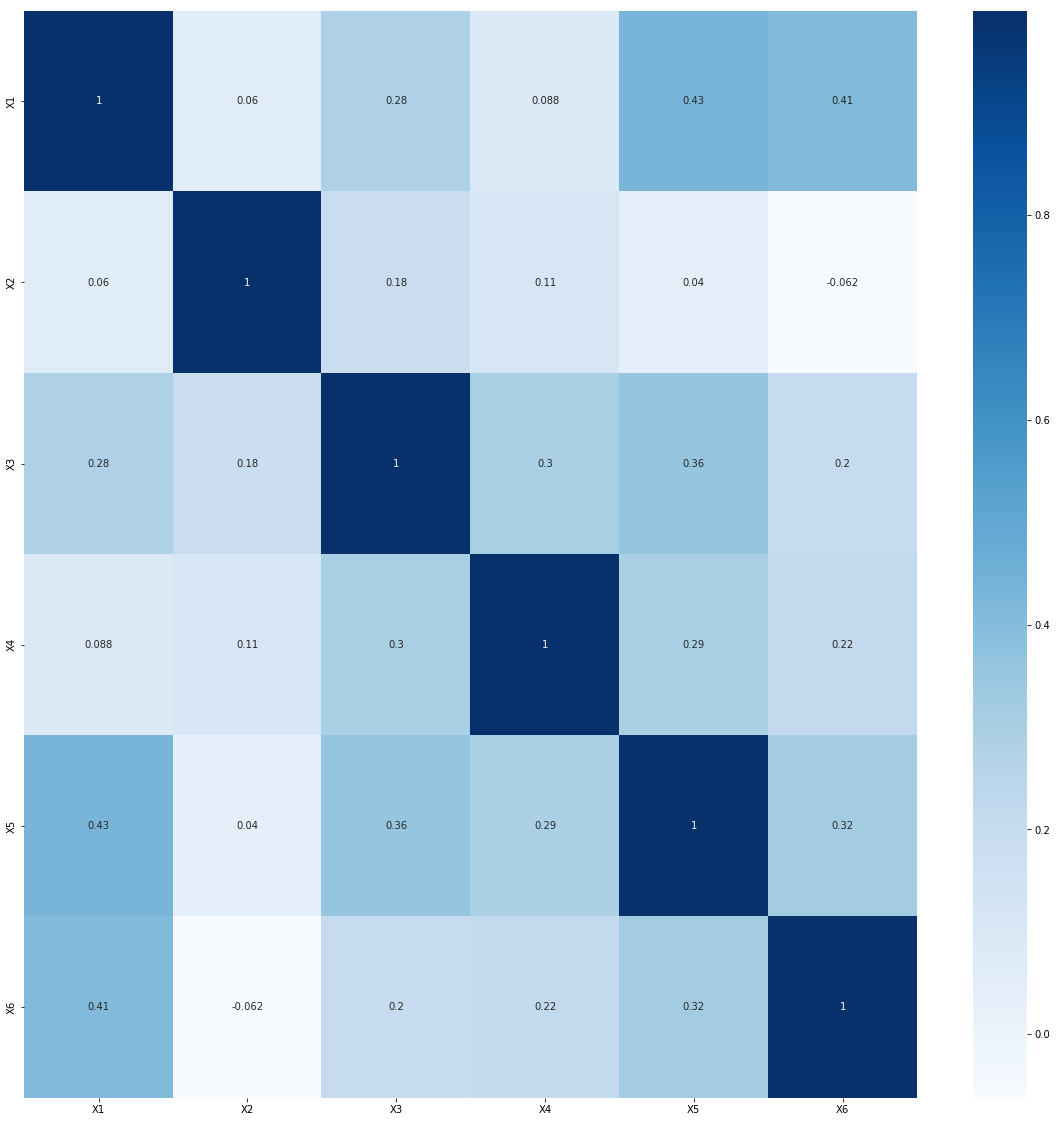

In [188]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate the correlation matrix for target relevant features that you previously determined
df_new = df.drop("Y", 1)
new_corr = df_new.corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

X5 is highly correlated with X4 and X3.
Retain X5 and remove X4 and X3

In [189]:
# Remove the features with high correlation to other features
subset_feature_corr_names = ["X1","X2","X5", "X6"]

# Calculate and check evaluation metrics
subset_feature_eval_df = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

# Append to results and display
results = results.append(subset_feature_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.653846,0.654762,0.692308,0.642857,0.666667,6
Strong features,0.653846,0.642857,0.647059,0.785714,0.709677,2
Subset features,0.730769,0.732143,0.769231,0.714286,0.740741,4


### Univariate Selection with Sci-Kit Learn

Sci-kit learn offers more filter methods in its feature selection module. Moreover, it also has convenience methods for how you would like to filter the features. You can see the available options here in the [official docs](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). 

For this exercise, you will compute the ANOVA F-values to select the top 3 features using `SelectKBest()`.

In [190]:
def univariate_selection():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 3 features based on f-test
    selector = SelectKBest(f_classif, k=3)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(df.drop("Y",1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = df.drop("Y",1 ).columns[feature_idx]
    
    return feature_names

You will now evaluate the model on the features selected by univariate selection.

In [191]:
univariate_feature_names = univariate_selection()

X1: True
X2: False
X3: False
X4: False
X5: True
X6: True


In [192]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.653846,0.654762,0.692308,0.642857,0.666667,6
Strong features,0.653846,0.642857,0.647059,0.785714,0.709677,2
Subset features,0.730769,0.732143,0.769231,0.714286,0.740741,4
F-test,0.692308,0.684524,0.687500,0.785714,0.733333,3


## Wrap Up

The best result was Subset features wtih accuracy of 73.0769%. The features used in the subset are:

X1 = my order was delivered on time.

X2 = contents of my order was as I expected.

X5 = I am satisfied with my courier.

X6 = the app makes ordering easy for me.


The result indicates that features that dont matter are:

X3 = I ordered everything I wanted to order.

X4 = I paid a good price for my order.


Looking ahead:

I do have the feeling that implementing feature engineering and depicting 1-5 rating for each feature as a character encoding may yield higher accuracy